Loaded tweets: 300 rows
Loaded reviews: 200 rows
Loaded news: 250 rows

Top keywords in tweets:
              word  count
0          product     87
1            keeps     71
2            great     65
3              new     53
4            brand     38
5          getting     38
6           better     38
7            every     38
8             year     38
9       initiative     35
10  sustainability     35
11             eco     35
12       packaging     35
13    disappointed     33
14          recent     33


C:\Users\Abhishekgantana\AppData\Local\Temp\ipykernel_22636\2121901194.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=top_words, palette="viridis")


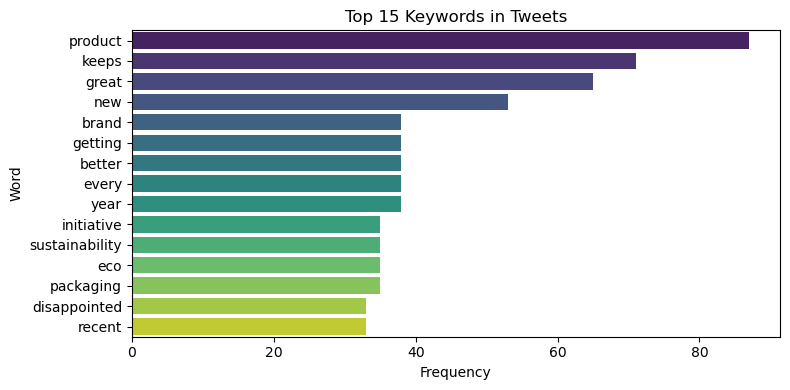


Top keywords in reviews:
          word  count
0      quality     57
1        sound     26
2      average     26
3        worth     26
4        price     26
5        month     26
6          use     26
7        still     26
8        works     26
9   flawlessly     26
10     display     22
11      design     22
12  absolutely     22
13    stunning     22
14    exceeded     22


C:\Users\Abhishekgantana\AppData\Local\Temp\ipykernel_22636\2121901194.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=top_words, palette="viridis")


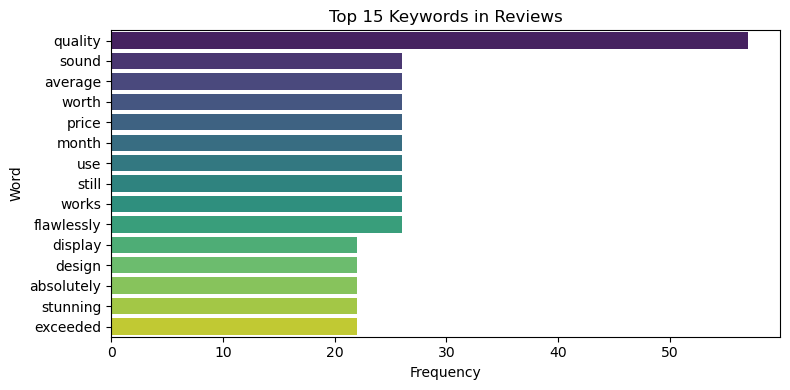


Top keywords in news:
           word  count
0        prices     55
1          data     38
2    innovative     34
3      startups     34
4       disrupt     34
5   traditional     34
6        retail     34
7    ecosystems     34
8     ecommerce     30
9          sees     30
10       record     30
11        sales     30
12      holiday     30
13       season     30
14         tech     30


C:\Users\Abhishekgantana\AppData\Local\Temp\ipykernel_22636\2121901194.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=top_words, palette="viridis")


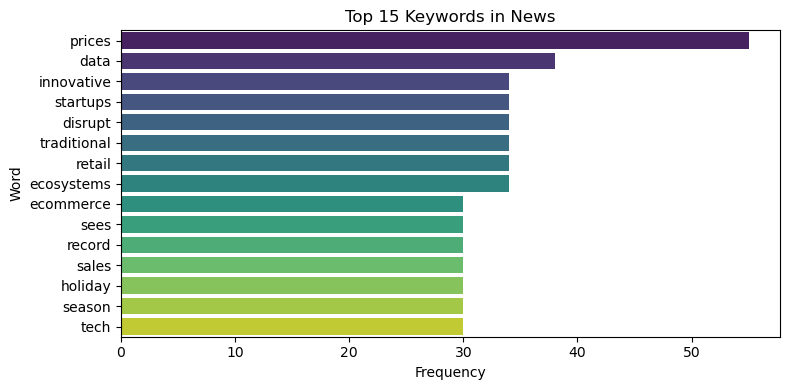

TF-IDF vectorization completed for tweets
TF-IDF vectorization completed for reviews
TF-IDF vectorization completed for news

Tweets - Top 3 Topics:
Topic 1: product, great, eco, sustainability, initiative, packaging, excellent, recommend, highly, value
Topic 2: mark, campaign, creative, missed, week, delivery, happy, delay, issue, resolved
Topic 3: year, brand, getting, better, keeps, skeptical, pricing, strategy, new, app

Reviews - Top 3 Topics:
Topic 1: buy, expectations, exceeded, absolutely, design, display, stunning, charging, faced, return
Topic 2: price, sound, average, worth, quality, smooth, performance, excellent, life, battery
Topic 3: works, use, flawlessly, month, money, highly, recommended, fantastic, value, quality

News - Top 3 Topics:
Topic 1: gdp, consumer, grows, expands, confidence, tech, stock, boom, surge, giants
Topic 2: sees, record, sales, season, holiday, ecommerce, rebounds, stabilize, sector, oil
Topic 3: traditional, retail, startups, ecosystems, innovati

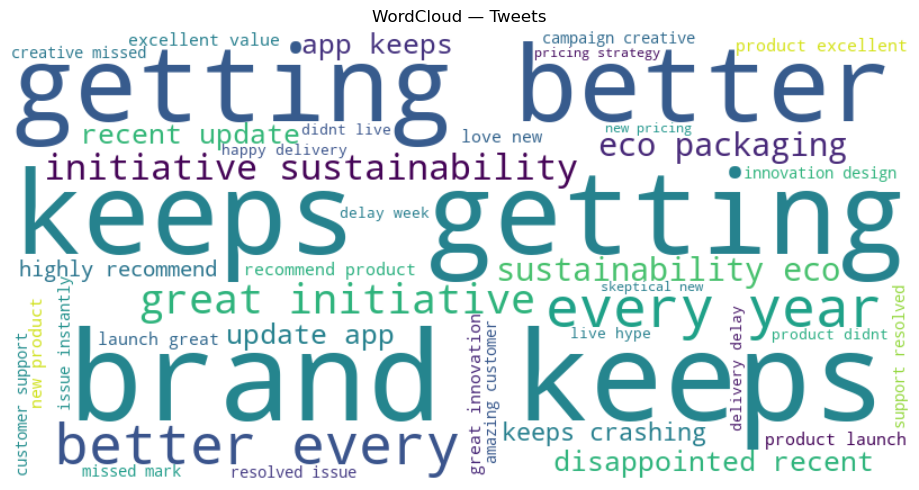

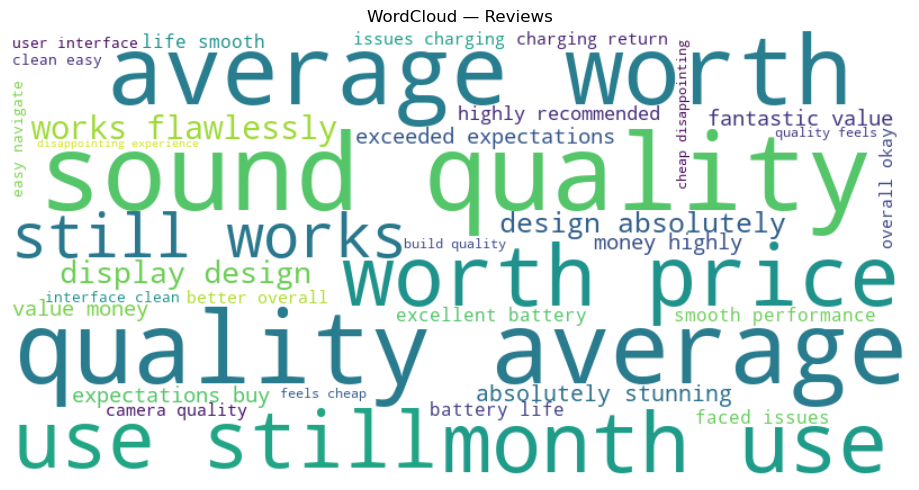

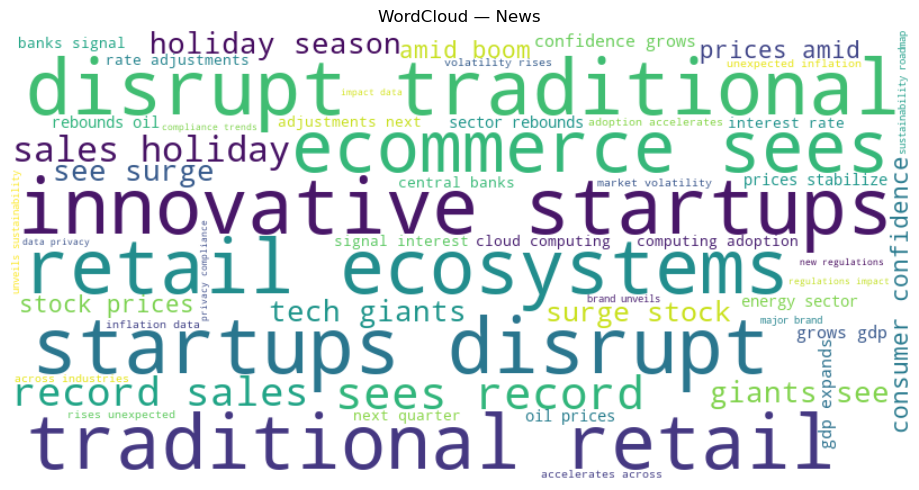


Topic modeling complete. Results saved as 'topic_summary.csv' in /outputs/


In [1]:
# ============================================================
# NOTEBOOK 3 — Topic Modeling & Keyword Analysis
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

# ---------- Setup ----------
input_folder = "./outputs/"
output_folder = "./outputs/"

os.makedirs(output_folder, exist_ok=True)

# ---------- Load Sentiment Datasets ----------
files = {
    "tweets": "tweets_with_sentiment.csv",
    "reviews": "reviews_with_sentiment.csv",
    "news": "news_with_sentiment.csv"
}

datasets = {}
for name, file in files.items():
    path = os.path.join(input_folder, file)
    if os.path.exists(path):
        datasets[name] = pd.read_csv(path)
        print(f"Loaded {name}: {datasets[name].shape[0]} rows")
    else:
        print(f"Warning: {file} not found.")

# ============================================================
# Step 1: Keyword Frequency Analysis
# ============================================================

from collections import Counter
import re

def get_top_keywords(texts, n=15):
    words = []
    for text in texts:
        if isinstance(text, str):
            text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
            words.extend(text.split())
    common_words = Counter(words).most_common(n)
    return pd.DataFrame(common_words, columns=["word", "count"])

for name, df in datasets.items():
    print(f"\nTop keywords in {name}:")
    top_words = get_top_keywords(df["cleaned_text"], 15)
    print(top_words)
    
    plt.figure(figsize=(8,4))
    sns.barplot(x="count", y="word", data=top_words, palette="viridis")
    plt.title(f"Top 15 Keywords in {name.capitalize()}")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f"{name}_top_keywords.png"))
    plt.show()

# ============================================================
# Step 2: TF-IDF Vectorization
# ============================================================

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")

tfidf_results = {}
for name, df in datasets.items():
    if "cleaned_text" in df.columns:
        tfidf_matrix = tfidf_vectorizer.fit_transform(df["cleaned_text"].dropna())
        feature_names = tfidf_vectorizer.get_feature_names_out()
        tfidf_results[name] = (tfidf_matrix, feature_names)
        print(f"TF-IDF vectorization completed for {name}")

# ============================================================
# Step 3: Topic Modeling (LDA)
# ============================================================

lda_results = {}

def display_topics(model, feature_names, no_top_words):
    topics = []
    for idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(", ".join(words))
    return topics

for name, (tfidf_matrix, feature_names) in tfidf_results.items():
    lda = LatentDirichletAllocation(n_components=3, random_state=42)
    lda.fit(tfidf_matrix)
    topics = display_topics(lda, feature_names, 10)
    lda_results[name] = topics

    print(f"\n{name.capitalize()} - Top 3 Topics:")
    for i, topic in enumerate(topics, 1):
        print(f"Topic {i}: {topic}")

# ============================================================
# Step 4: WordCloud Visualization
# ============================================================

for name, df in datasets.items():
    text = " ".join(df["cleaned_text"].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud — {name.capitalize()}")
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f"{name}_wordcloud.png"))
    plt.show()

# ============================================================
# Step 5: Topic Summary Export
# ============================================================

summary_data = []
for name, topics in lda_results.items():
    for i, topic in enumerate(topics, 1):
        summary_data.append([name, f"Topic {i}", topic])

topics_df = pd.DataFrame(summary_data, columns=["Dataset", "Topic", "Keywords"])
topics_df.to_csv(os.path.join(output_folder, "topic_summary.csv"), index=False)

print("\nTopic modeling complete. Results saved as 'topic_summary.csv' in /outputs/")
